<a href="https://colab.research.google.com/github/narutsoo/tutorial/blob/master/Column_Transformer_for_DataPrep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic : How to Use the ColumnTransformer for Data Preparation
*Reference*

* https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/

---
Import related libraries

In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from numpy import mean
from numpy import std
from numpy import absolute

Import data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/abalone.csv", header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Define input and output variables

In [4]:
X = data.iloc[:,0:8]
y = data.iloc[:,8]

Determine Numerical or Categorical features

In [5]:
numerical_ix = X.select_dtypes(include=['int64','float64']).columns
categorical_ix = X.select_dtypes(include=['object','bool']).columns

In [6]:
print (numerical_ix)
print (categorical_ix)

Int64Index([1, 2, 3, 4, 5, 6, 7], dtype='int64')
Int64Index([0], dtype='int64')


Column Transformer

In [7]:
t = [('cat', OneHotEncoder(), categorical_ix), ('num', MinMaxScaler(), numerical_ix)]

In [8]:
col_transform = ColumnTransformer(transformers=t)

Define the model

In [9]:
model = SVR(kernel='rbf', gamma='scale', C=100)

In [10]:
pipeline = Pipeline(steps=[('prep', col_transform), ('model', model)])

Define cross-validation configuration

In [11]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)

Evaluate the pipeline using cross-validation using MAE

In [12]:
scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [13]:
scores = absolute(scores)

Print model's performance (average using the results of 10 Folds)

In [14]:
print ('Accuracy = %.3f (std = %.3f)' %(mean(scores), std(scores)))

Accuracy = 1.465 (std = 0.047)


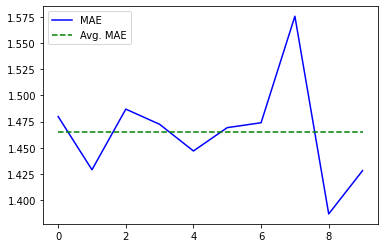

In [23]:
import matplotlib.pyplot as plt

plt.plot(scores, 'b-', label = 'MAE')
plt.plot([mean(scores)] * len(scores), 'g--', label = 'Avg. MAE')
plt.legend()
plt.show()